# Face Verification and Recognition

### Packages

In [82]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Encoding Face Images into a 128-Dimensional Vector

<img src="images/encoding_eg.png" style="width:680px;height:250px;">

### The Triplet loss

Compute the full formula by taking the max with zero and summing over the training examples:$$\mathcal{J} = \sum^{m}_{i=1} \large[ \small \mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2 - \mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2+ \alpha \large ] \small_+ \tag{1}$$

In [84]:
def triplet_loss(y_true, y_pred, alpha = 0.2):
    """    
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, we don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor images, of shape (None, 128)
            positive -- the encodings for the positive images, of shape (None, 128)
            negative -- the encodings for the negative images, of shape (None, 128)
    
    Returns:
    loss -- real number, value of the loss
    """

    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,positive)),axis=-1)
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,negative)),axis=-1)
    basic_loss = tf.maximum(tf.add(tf.subtract(pos_dist,neg_dist),alpha),0)
    loss = tf.reduce_sum(basic_loss)  # summation function 
    return loss

<img src="images/example_of_distance.png" style="width:680px;height:250px;">


### loading the pretrained model

In [86]:
from keras_facenet import FaceNet
FRmodel = FaceNet()

In [87]:
def img_to_encoding(image_path, model):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    print(f"Image Shape: {img.shape}, Pixel Range: {img.min()} to {img.max()}")  # Debug
    
    # Expand dimensions to add batch size
    x_train = np.expand_dims(img, axis=0)
    print(f"Input to Model Shape: {x_train.shape}")  # Debug
    
    # Get embeddings from the model
    embedding = embedder.model(x_train)  # Use `predict` for inference
    print(f"Raw Embedding: {embedding}")  # Debug
    
    # Normalize the embedding vector
    normalized_embedding = embedding / np.linalg.norm(embedding, ord=2)
    print(f"Normalized Embedding: {normalized_embedding}")  # Debug
    
    return normalized_embedding


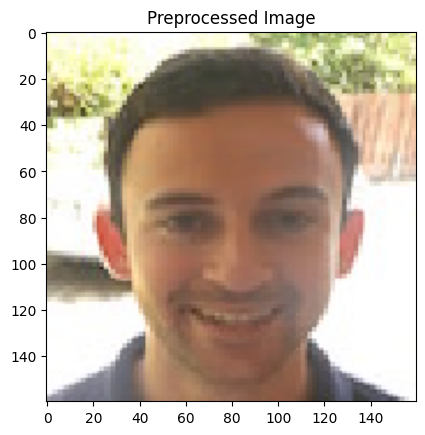

In [114]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title("Preprocessed Image")
plt.show()


### loading to the database

In [91]:
database = {}
database["danielle"] = img_to_encoding("images/danielle.png", FRmodel)
database["younes"] = img_to_encoding("images/younes.jpg", FRmodel)
database["tian"] = img_to_encoding("images/tian.jpg", FRmodel)
database["andrew"] = img_to_encoding("images/andrew.jpg", FRmodel)
database["kian"] = img_to_encoding("images/kian.jpg", FRmodel)
database["dan"] = img_to_encoding("images/dan.jpg", FRmodel)
database["sebastiano"] = img_to_encoding("images/sebastiano.jpg", FRmodel)
database["bertrand"] = img_to_encoding("images/bertrand.jpg", FRmodel)
database["kevin"] = img_to_encoding("images/kevin.jpg", FRmodel)
database["felix"] = img_to_encoding("images/felix.jpg", FRmodel)
database["benoit"] = img_to_encoding("images/benoit.jpg", FRmodel)
database["arnaud"] = img_to_encoding("images/arnaud.jpg", FRmodel)

Image Shape: (160, 160, 3), Pixel Range: 0.058823529411764705 to 0.996078431372549
Input to Model Shape: (1, 160, 160, 3)
Raw Embedding: [[-0.05955769  0.00987101 -0.00291039 -0.01013006  0.09023928 -0.07465141
   0.01788601  0.04681385 -0.00626776  0.05692759  0.02517034 -0.00346209
  -0.01503424 -0.03763257 -0.04078074  0.00790139 -0.10816856  0.05313238
  -0.02943944 -0.00173074 -0.00693876  0.04760841 -0.05090205 -0.00551789
  -0.0830059   0.0408893   0.05763659 -0.02266612 -0.04197636 -0.03155699
   0.04857619  0.0094696   0.09845155 -0.04766627  0.04637502 -0.03732736
   0.02445404  0.05020481 -0.01380968 -0.04346847 -0.06631758 -0.02324449
   0.02220806  0.02489758  0.01647591 -0.02739193 -0.03327373  0.03012361
  -0.01949726  0.01925243 -0.04146315 -0.00405869 -0.03531065 -0.06333204
  -0.00075689  0.06359256 -0.02535097 -0.01846346 -0.05159871 -0.02573721
  -0.01805302  0.01552193  0.03690837  0.00066285 -0.05301299 -0.08897036
  -0.07309409  0.01426744  0.01399576  0.02301553

In [92]:
danielle = tf.keras.preprocessing.image.load_img("images/danielle.png", target_size=(160, 160))
kian = tf.keras.preprocessing.image.load_img("images/kian.jpg", target_size=(160, 160))
benoit = tf.keras.preprocessing.image.load_img("images/benoit.jpg", target_size=(160, 160))


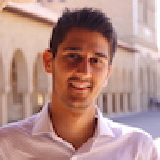

In [93]:
kian

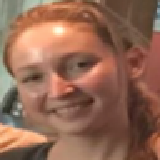

In [94]:
danielle

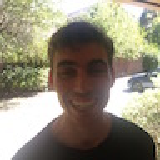

In [95]:
benoit

In [96]:
np.around(np.array(benoit) / 255.0, decimals=12).shape
np.around(np.array(benoit) / 255.0, decimals=12).shape
np.around(np.array(benoit) / 255.0, decimals=12).shape

(160, 160, 3)

### Verfication 

    Function that verifies if the person on the "image_path" image is "identity".


In [97]:
def verify(image_path, identity, database, model):
    """
    Arguments:
        image_path -- path to an image
        identity -- string, name of the person you'd like to verify the identity. Has to be an employee who works in the office.
        database -- python dictionary mapping names of allowed people's names (strings) to their encodings (vectors).
        model -- your Inception model instance in Keras
    
    Returns:
        dist -- distance between the image_path and the image of "identity" in the database.
        door_open -- True, if the door should open. False otherwise.
    """
    encoding = img_to_encoding(image_path, model)
    # print(f"Encoding for {image_path}: {encoding}")
    # print(f"Database encoding for {identity}: {database[identity]}")

    dist = np.linalg.norm(encoding - database[identity])    # euclidean distance
    print(f"Distance: {dist}")
    if dist < 0.7:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", nikal peli fursat mein")
        door_open = False
    return dist, door_open

In [98]:

bertrand = tf.keras.preprocessing.image.load_img("images/camera_0.jpg", target_size=(160, 160))

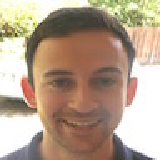

In [99]:
bertrand

In [100]:
verify("images/camera_0.jpg", "younes", database, FRmodel)

Image Shape: (160, 160, 3), Pixel Range: 0.08627450980392157 to 1.0
Input to Model Shape: (1, 160, 160, 3)
Raw Embedding: [[-4.99414057e-02  5.13142310e-02 -1.20094391e-02 -4.51905727e-02
   6.77992776e-02  1.63194817e-02  7.82044306e-02 -2.71392707e-02
   1.41013518e-03  9.43482947e-03 -3.02497353e-02 -2.26814300e-02
  -3.82969715e-02  7.28445277e-02 -9.58977733e-03 -4.94016074e-02
  -9.29505900e-02 -5.12837917e-02  3.65487285e-05 -1.22654838e-02
  -8.57488811e-02  3.83516774e-02 -2.03972068e-02 -9.42615885e-03
   2.78424527e-02 -7.18435869e-02 -5.38852531e-03 -4.64993268e-02
  -9.84318834e-03 -1.03298604e-01 -1.32573638e-02  5.17689995e-02
   1.60558764e-02  8.04776549e-02  2.09992491e-02  2.41314378e-02
   4.46847193e-02  3.23251821e-02 -1.47406217e-02 -8.61470550e-02
   5.85358543e-03  2.21892167e-02 -2.87203211e-03 -8.06565117e-03
  -9.39414371e-04 -3.64577472e-02  1.02139451e-02  2.91104661e-03
   3.94554064e-02 -3.74754891e-02 -1.65185984e-02 -1.94888264e-02
   2.68328306e-03 -8

(np.float32(0.5448771), True)

In [101]:
verify("images/camera_2.jpg", "kian", database, FRmodel)

Image Shape: (160, 160, 3), Pixel Range: 0.0 to 1.0
Input to Model Shape: (1, 160, 160, 3)
Raw Embedding: [[ 3.27940211e-02 -1.17403176e-02 -5.37902899e-02  5.58932871e-02
   6.54616058e-02  3.42447311e-02  4.77029663e-03  5.53812310e-02
  -2.67968848e-02  2.46219393e-02  1.88061055e-02 -2.43171286e-02
  -1.01078022e-03  1.69332232e-02  5.13554998e-02 -4.75172475e-02
  -1.10686887e-02  2.51801610e-02 -2.61225943e-02 -6.40695617e-02
  -9.13359299e-02  4.16100621e-02  6.22489601e-02 -4.97697927e-02
  -4.07904498e-02  3.27013545e-02 -1.72732249e-02 -8.38825628e-02
   3.92985828e-02 -1.40610628e-03 -1.16048515e-01  1.28931096e-02
  -2.01668427e-03 -3.39840129e-02 -2.98451539e-02  4.61040325e-02
   4.68827225e-02  1.21528748e-03 -5.85528500e-02 -2.43242793e-02
  -2.88646407e-02  5.76404296e-02 -1.63278822e-02 -2.82080900e-02
   5.04746474e-03  1.81206185e-02  4.32458706e-02  8.75619426e-02
  -1.22791618e-01 -2.73230933e-02  7.76077388e-03 -4.12747599e-02
   6.14702003e-04  1.72252543e-02 -9

(np.float32(1.3556261), False)

In [102]:
verify("images/andrew.jpg", "andrew", database, FRmodel)

Image Shape: (160, 160, 3), Pixel Range: 0.0 to 1.0
Input to Model Shape: (1, 160, 160, 3)
Raw Embedding: [[ 0.01917717 -0.03002161  0.04114333  0.07220279  0.03731948  0.04723132
  -0.04023637 -0.03559121  0.0233227  -0.01149638  0.01506354  0.00075615
   0.01504063 -0.0086697  -0.02504112 -0.02257352  0.01209971  0.08728266
  -0.01228642  0.00101203 -0.02590086  0.04122088  0.0358083   0.01572196
  -0.03875178  0.00844314  0.03576814  0.00859135  0.02758403  0.0176947
   0.105219    0.08964967  0.08031671  0.05311723  0.0280832  -0.04678219
  -0.02233761 -0.02270583 -0.0737388   0.07555513  0.03681188 -0.07839837
   0.03347801 -0.00594129 -0.02813391  0.00541217 -0.00435335  0.05450423
  -0.0601672  -0.00375053  0.01883805  0.03742929  0.0804656   0.06556235
   0.0789035  -0.0211773   0.05813885  0.01428266  0.08263616  0.01354398
   0.00455119 -0.01835671  0.029094   -0.04421739  0.01915492  0.02436308
  -0.03815478 -0.02580727 -0.01856716  0.00206826  0.02789434  0.00359997
  -0.04

(np.float32(0.0), True)

## Face recognition

implementation of who it is function

In [111]:
def who_is_it(image_path, database, model):
    """
    Implements face recognition for the office by finding who is the person on the image_path image.
    
    Arguments:
        image_path -- path to an image
        database -- database containing image encodings along with the name of the person on the image
        model -- your Inception model instance in Keras
    
    Returns:
        min_dist -- the minimum distance between image_path encoding and the encodings from the database
        identity -- string, the name prediction for the person on image_path
    """   
    encoding = img_to_encoding(image_path,model)
    
    min_dist = 100
    
    for (name, db_enc) in database.items():
        
        dist = np.linalg.norm(encoding - db_enc)

        if dist < min_dist:
            min_dist = dist
            identity = name
    
    
    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity


In [113]:
test2 = who_is_it("images/camera_0.jpg", database, FRmodel)

Image Shape: (160, 160, 3), Pixel Range: 0.08627450980392157 to 1.0
Input to Model Shape: (1, 160, 160, 3)
Raw Embedding: [[-4.99414057e-02  5.13142310e-02 -1.20094391e-02 -4.51905727e-02
   6.77992776e-02  1.63194817e-02  7.82044306e-02 -2.71392707e-02
   1.41013518e-03  9.43482947e-03 -3.02497353e-02 -2.26814300e-02
  -3.82969715e-02  7.28445277e-02 -9.58977733e-03 -4.94016074e-02
  -9.29505900e-02 -5.12837917e-02  3.65487285e-05 -1.22654838e-02
  -8.57488811e-02  3.83516774e-02 -2.03972068e-02 -9.42615885e-03
   2.78424527e-02 -7.18435869e-02 -5.38852531e-03 -4.64993268e-02
  -9.84318834e-03 -1.03298604e-01 -1.32573638e-02  5.17689995e-02
   1.60558764e-02  8.04776549e-02  2.09992491e-02  2.41314378e-02
   4.46847193e-02  3.23251821e-02 -1.47406217e-02 -8.61470550e-02
   5.85358543e-03  2.21892167e-02 -2.87203211e-03 -8.06565117e-03
  -9.39414371e-04 -3.64577472e-02  1.02139451e-02  2.91104661e-03
   3.94554064e-02 -3.74754891e-02 -1.65185984e-02 -1.94888264e-02
   2.68328306e-03 -8

now you can easily recognize your girl friends

<a name='6'></a>
## References
1. Florian Schroff, Dmitry Kalenichenko, James Philbin (2015). [FaceNet: A Unified Embedding for Face Recognition and Clustering](https://arxiv.org/pdf/1503.03832.pdf)

2. Yaniv Taigman, Ming Yang, Marc'Aurelio Ranzato, Lior Wolf (2014). [DeepFace: Closing the gap to human-level performance in face verification](https://research.fb.com/wp-content/uploads/2016/11/deepface-closing-the-gap-to-human-level-performance-in-face-verification.pdf)

3. This implementation also took a lot of inspiration from the official FaceNet github repository: https://github.com/davidsandberg/facenet

4. Further inspiration was found here: https://machinelearningmastery.com/how-to-develop-a-face-recognition-system-using-facenet-in-keras-and-an-svm-classifier/

5. And here: https://github.com/nyoki-mtl/keras-facenet/blob/master/notebook/tf_to_keras.ipynb